In [2]:
# Load libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import svm
import seaborn as sns
import pandas as pd
from PIL import Image
import math
plt.style.use('seaborn')

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [3]:
# Load the CSV file
data = pd.read_csv("C:\\Users\\cvveljanovski\\Desktop\\carshare.csv")

In [5]:
##Print top 5 rows
data.head()

##Check for # of empty cells
print(data.isnull().sum())

##Check mean, std etc in data
print(data.describe())

##Check the data format of the columns 
print(data.info())

Hash               0
city               0
vendor             0
plate              0
start_time         0
end_time           0
start_latitude     0
start_longitude    0
end_latitude       0
end_longitude      0
start_soc          0
end_soc            0
month              0
weekday            0
day                0
hour               0
minute             0
duration           0
daytype            0
soc_delta          0
event_type         0
event_hash         0
dtype: int64
               plate  start_latitude  start_longitude   end_latitude  \
count  236503.000000   236503.000000    236503.000000  236503.000000   
mean      362.706646       45.469559         9.187739      45.469569   
std       210.385051        0.019752         0.029022       0.019750   
min         0.000000       45.358310         8.722840      45.358310   
25%       180.000000       45.454560         9.167450      45.454570   
50%       364.000000       45.468990         9.188780      45.468990   
75%       545.000000 

In [6]:
#drop unnecessary columns
data.drop(["Hash","event_hash","event_type","city","vendor", "minute"],inplace=True,axis=1)
data.head()

plate     start_time       end_time  start_latitude  start_longitude  \
0    103  9/1/2017 0:00  9/1/2017 0:18        45.47255          9.14291   
1    335  9/1/2017 0:01  9/1/2017 0:36        45.48901          9.21042   
2     72  9/1/2017 0:02  9/1/2017 0:26        45.47647          9.20613   
3    665  9/1/2017 0:03  9/1/2017 0:04        45.48944          9.23178   
4    181  9/1/2017 0:04  9/1/2017 0:04        45.48495          9.13549   

   end_latitude  end_longitude  start_soc  end_soc  month  weekday  day  hour  \
0      45.46791        9.15929         34      100      9        4    1     0   
1      45.46828        9.15019        100      100      9        4    1     0   
2      45.43972        9.21720         81       81      9        4    1     0   
3      45.48944        9.23178         62       62      9        4    1     0   
4      45.48495        9.13549         28       28      9        4    1     0   

    duration  daytype  soc_delta  
0  18.200000  weekday         66  
1  34.700000  weekday          0  
2  24.333333  weekday          0  
3   0.833333  weekday          0  
4   0.750000  weekday          0

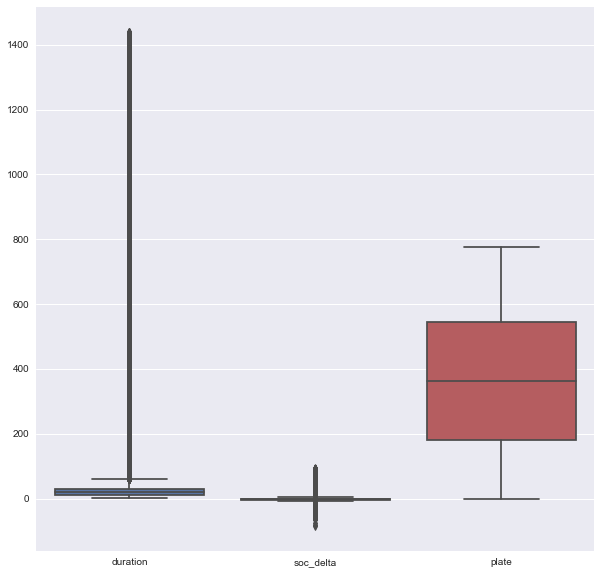

In [7]:
## EXPLORATORY DATA ANALYSIS FOR THE VARILUS COLUMNS
# for duration, soc_delta and plate the distribution of theese continous variables 
sns.boxplot(data=data[["duration","soc_delta","plate"]])
fig=plt.gcf()
fig.set_size_inches(10,10)

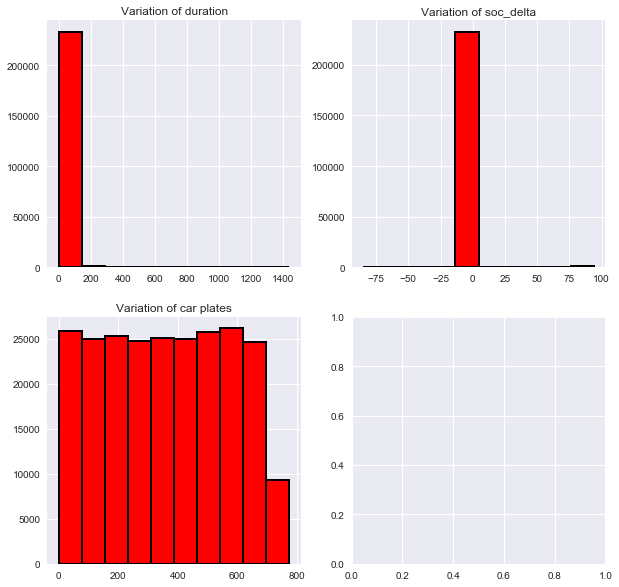

In [8]:
#Using histogramsfor the same above
data.duration.unique()
fig, axes = plt.subplots(2,2)
axes[0,0].hist(x="duration", data=data, edgecolor="black", linewidth=2, color="red")
axes[0,0].set_title("Variation of duration")
axes[0,1].hist(x="soc_delta", data=data, edgecolor="black", linewidth=2, color="red")
axes[0,1].set_title("Variation of soc_delta")
axes[1,0].hist(x="plate", data=data, edgecolor="black", linewidth=2, color="red")
axes[1,0].set_title("Variation of car plates")
fig.set_size_inches(10,10)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


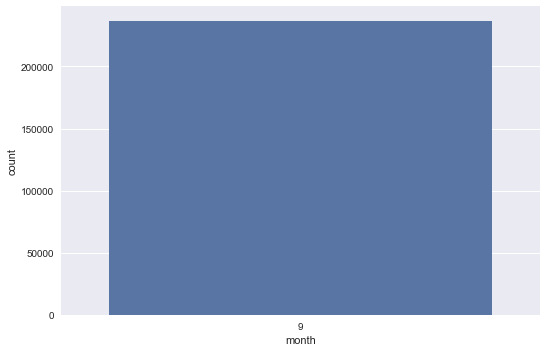

In [9]:
sns.factorplot(x='month', data=data, kind='count', size = 5, aspect=1.5)

In [ ]:
#the data we have is just for one month

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


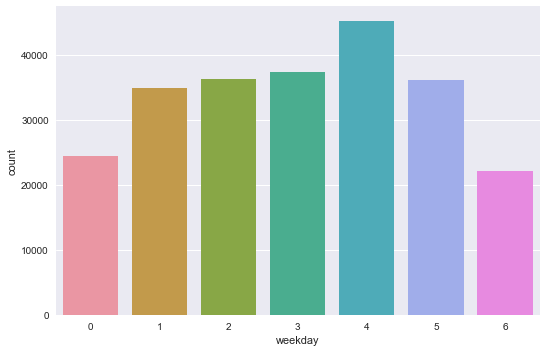

In [10]:
sns.factorplot(x='weekday', data=data, kind='count', size = 5, aspect=1.5)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


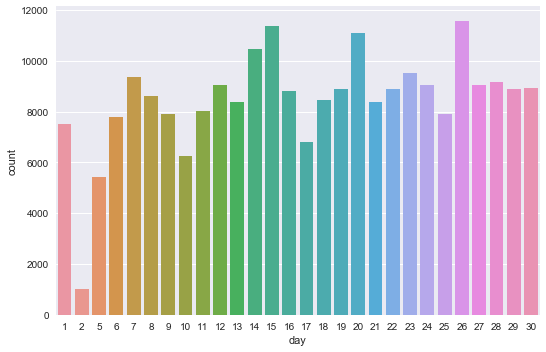

In [11]:
sns.factorplot(x='day', data=data, kind='count', size = 5, aspect=1.5)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


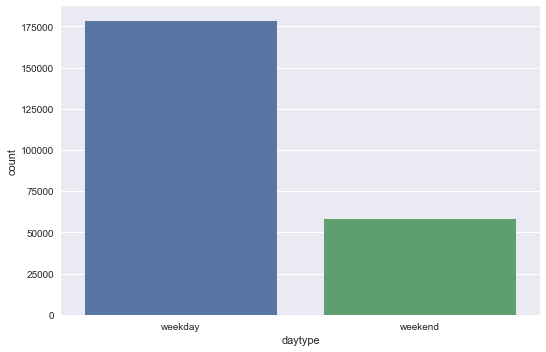

In [12]:
sns.factorplot(x='daytype', data=data, kind='count', size = 5, aspect=1.5)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


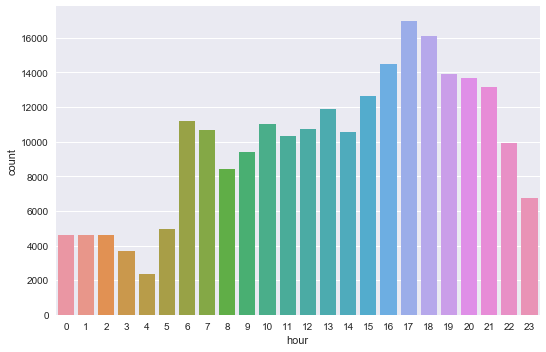

In [13]:
sns.factorplot(x='hour', data=data, kind='count', size = 5, aspect=1.5)

In [10]:
# Calculate distance between start and end of the trip
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [11]:
dis = []
for i in range(0, 236503):
    lat1 = data["start_latitude"].iloc[i] 
    lat2 = data["end_latitude"].iloc[i]
    lon1 = data["start_longitude"].iloc[i] 
    lon2 = data["end_longitude"].iloc[i]
    dis.append(distance((lat1, lon1), (lat2, lon2)))

In [12]:
data['distance'] = dis

In [13]:
# What is the average distance of the trips
distance_mean = np.mean(data["distance"])
print("The mean distance of the trips in KM is:", distance_mean)
#The mean distance of the trips in KM is: 2.023611357434557

# What is the longest distance trip
distance_max = np.max(data["distance"])
print("The maximum distance of the trips is", distance_max)
#The maximum distance of the trips is 39.87549610604514

# What is the shortest distance trip
distance_min = np.min(data["distance"])
print("The minimum distance of the trips is", distance_min)
#The minimum distance of the trips is 0.0

The mean distance of the trips in KM is: 2.023611357434557
The maximum distance of the trips is 39.87549610604514
The minimum distance of the trips is 0.0


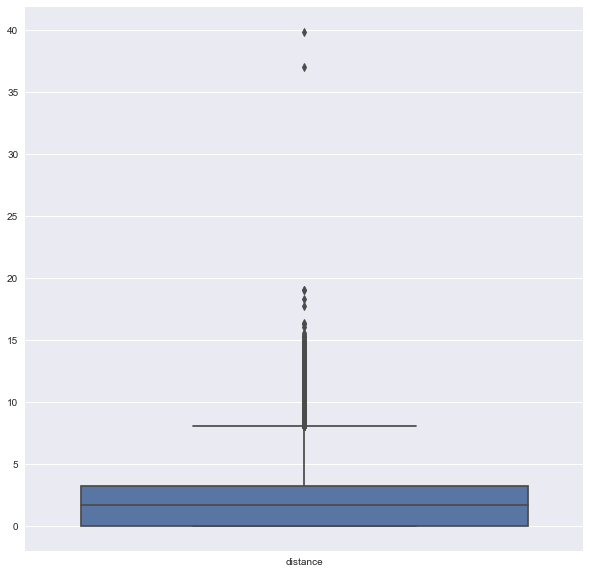

In [15]:
sns.boxplot(data=data[["distance"]])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [18]:
#Lets print out the map of the departures and of the arrivals of the cars
#BBox = (data.start_longitude.min(), data.start_longitude.max(), data.start_latitude.min(), data.start_latitude.max())
BBox = (9.1224, 9.2683, 45.4341, 45.5025)
BBox

(9.1224, 9.2683, 45.4341, 45.5025)

In [19]:
#Load the MAP immage
ruh_m = plt.imread('C:\\Users\\cvveljanovski\\Desktop\\mapp.png')

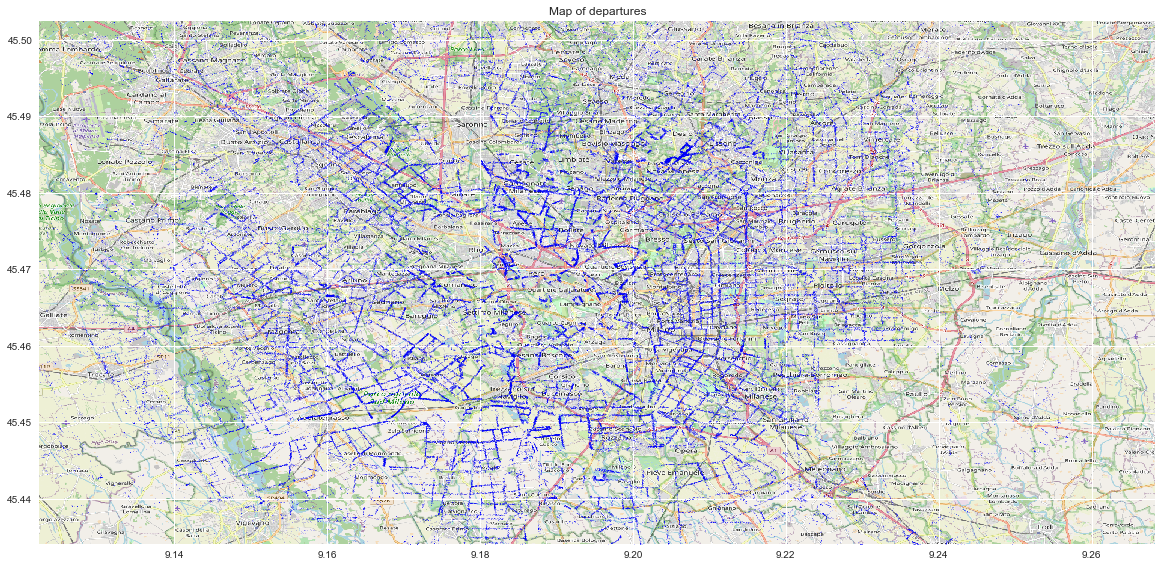

In [20]:
fix, ax = plt.subplots(figsize = (20,20))
ax.scatter(data.start_longitude, data.start_latitude, zorder =1, alpha = 0.2, c = 'b', s = 0.5)
ax.set_title("Map of departures")
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(ruh_m, zorder=0, extent = BBox, aspect = "equal")

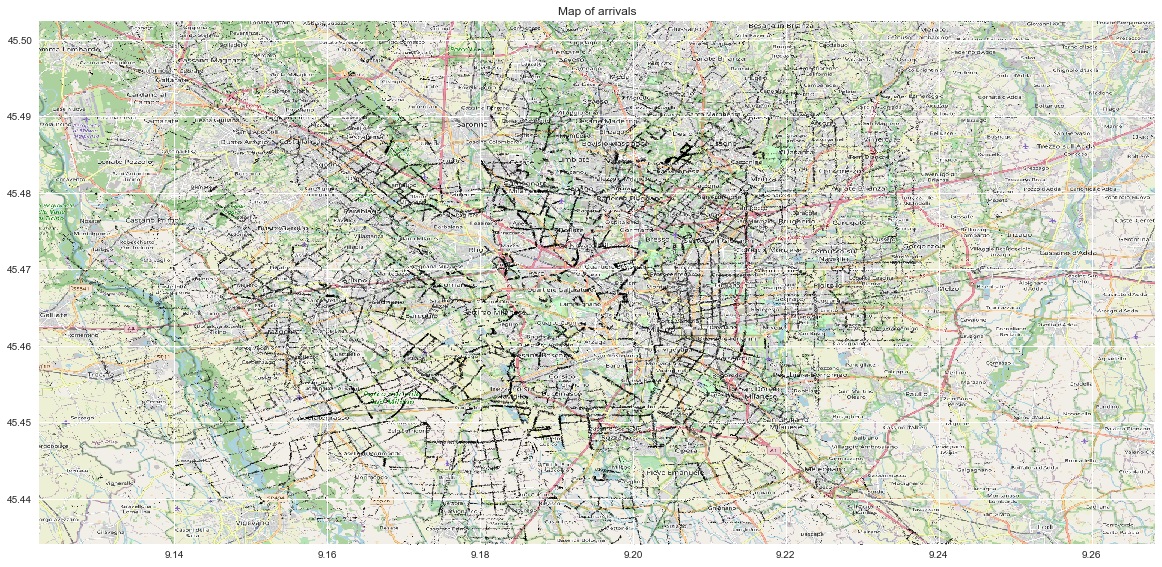

In [21]:
fix, ax = plt.subplots(figsize = (20,20))
ax.scatter(data.end_longitude, data.end_latitude, zorder =1, alpha = 0.2, c = "black", s = 0.5)
ax.set_title("Map of arrivals")
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])

ax.imshow(ruh_m, zorder=0, extent = BBox, aspect = "equal")

In [22]:
# What is the average duration of the trips
duration_mean = np.mean(data["duration"])
print("The mean duration of the trips in minutes is:", duration_mean)
#Result: 28.614607214257198 minutes
# What is the longest duration trip
duration_max = np.max(data["duration"])
print("The maximum duration of the trips is", duration_max, "in minutes or", duration_max/60, "in hours.")
# The maximum duration of the trips is 1439.866667 in minutes or 23.997777783333333 in hours.
# What is the shortest duration trip
duration_min = np.min(data["duration"])
print("The minimum duration of the trips is", duration_min, "minutes or", duration_min*60, "in seconds")
#The minimum duration of the trips is 0.483333333 minutes or 28.99999998 in seconds

The mean duration of the trips in minutes is: 28.614607214257198
The maximum duration of the trips is 1439.866667 in minutes or 23.997777783333333 in hours.
The minimum duration of the trips is 0.483333333 minutes or 28.99999998 in seconds


In [23]:
num_delta_0 = data["soc_delta"].value_counts(normalize=True)
num_delta_0*100
# Percentage of customers that return the car with the same amout of gas is 70.3%.

 0     70.297206
-3     21.770548
-4      3.933565
-6      1.341632
-7      0.476950
 88     0.380122
-9      0.183084
-10     0.121774
 79     0.072304
 85     0.068498
 82     0.067652
-13     0.062578
 72     0.061733
 75     0.055390
-12     0.053276
 91     0.048202
 66     0.047357
 63     0.046934
 4      0.045665
 41     0.044820
 60     0.043128
 69     0.042706
 47     0.039746
 38     0.038900
 54     0.038477
 22     0.037632
 50     0.037209
 35     0.035095
-16     0.034672
 57     0.033826
         ...    
 59     0.001691
-54     0.001268
-53     0.001268
-47     0.001268
 71     0.001268
 56     0.001268
-60     0.001268
 65     0.001268
 78     0.001268
 21     0.000846
-62     0.000846
 15     0.000846
 28     0.000846
 12     0.000846
 37     0.000846
 31     0.000846
 46     0.000846
-57     0.000846
-63     0.000846
-46     0.000423
 34     0.000423
 76     0.000423
 43     0.000423
-85     0.000423
-82     0.000423
 94     0.000423
-56     0.000423
-75     0.0004

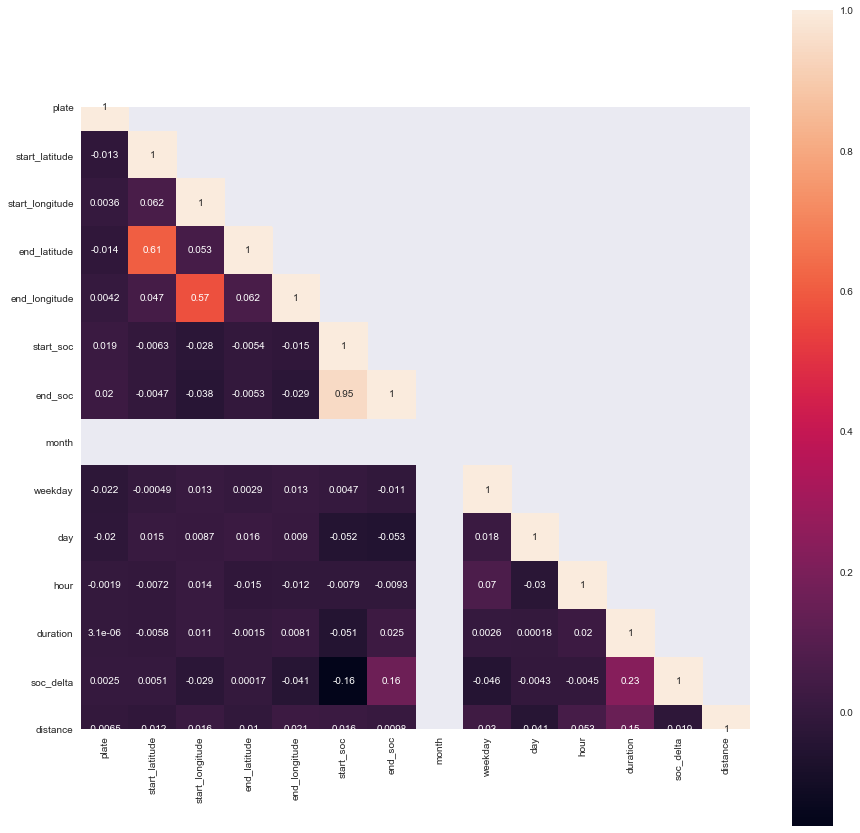

In [24]:
#Now lets see the correlation matrix to see how the variables are correlated among them selves
cor_mat=data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

We can see no significant correlation the different variables

In [17]:
df = data.copy()
#Split start_time and end_time columns in two separate columns by date and time
df['Start_Date'] = pd.to_datetime(df['start_time']).dt.date
df['Start_Time'] = pd.to_datetime(df['start_time']).dt.time
df.head()

plate     start_time       end_time  start_latitude  start_longitude  \
0    103  9/1/2017 0:00  9/1/2017 0:18        45.47255          9.14291   
1    335  9/1/2017 0:01  9/1/2017 0:36        45.48901          9.21042   
2     72  9/1/2017 0:02  9/1/2017 0:26        45.47647          9.20613   
3    665  9/1/2017 0:03  9/1/2017 0:04        45.48944          9.23178   
4    181  9/1/2017 0:04  9/1/2017 0:04        45.48495          9.13549   

   end_latitude  end_longitude  start_soc  end_soc  month  weekday  day  hour  \
0      45.46791        9.15929         34      100      9        4    1     0   
1      45.46828        9.15019        100      100      9        4    1     0   
2      45.43972        9.21720         81       81      9        4    1     0   
3      45.48944        9.23178         62       62      9        4    1     0   
4      45.48495        9.13549         28       28      9        4    1     0   

    duration  daytype  soc_delta  distance  Start_Date Start_Time  
0  18.200000  weekday         66  1.377561  2017-09-01   00:00:00  
1  34.700000  weekday          0  5.231193  2017-09-01   00:01:00  
2  24.333333  weekday          0  4.176632  2017-09-01   00:02:00  
3   0.833333  weekday          0  0.000000  2017-09-01   00:03:00  
4   0.750000  weekday          0  0.000000  2017-09-01   00:04:00

In [18]:
#Drop columns not usefull
df.drop(["plate","start_time","end_time","start_latitude","start_longitude","end_latitude","end_longitude","start_soc","end_soc","month","duration","daytype","soc_delta","distance","Start_Date","Start_Time"],inplace=True,axis=1)

In [19]:
df.head()

weekday  day  hour
0        4    1     0
1        4    1     0
2        4    1     0
3        4    1     0
4        4    1     0

In [29]:
counted_df = df.groupby(["day", "hour","weekday"]).size().reset_index(name="count")

In [30]:
counted_df

day  hour  weekday  count
0      1     0        4     46
1      1     1        4     26
2      1     2        4     32
3      1     3        4     39
4      1     4        4     78
5      1     5        4    176
6      1     6        4    474
7      1     7        4    366
8      1     8        4    287
9      1     9        4    278
10     1    10        4    340
11     1    11        4    344
12     1    12        4    346
13     1    13        4    335
14     1    14        4    351
15     1    15        4    517
16     1    16        4    525
17     1    17        4    612
18     1    18        4    543
19     1    19        4    419
20     1    20        4    376
21     1    21        4    388
22     1    22        4    366
23     1    23        4    259
24     2     0        5    141
25     2     1        5     73
26     2     2        5     54
27     2     3        5    738
28     5     9        1     33
29     5    10        1    377
..   ...   ...      ...    ...
613   29    18        4    608
614   29    19        4    547
615   29    20        4    508
616   29    21        4    520
617   29    22        4    492
618   29    23        4    377
619   30     0        5    206
620   30     1        5    140
621   30     2        5    112
622   30     3        5     88
623   30     4        5     71
624   30     5        5    112
625   30     6        5    199
626   30     7        5    279
627   30     8        5    335
628   30     9        5    369
629   30    10        5    502
630   30    11        5    417
631   30    12        5    393
632   30    13        5    411
633   30    14        5    443
634   30    15        5    451
635   30    16        5    461
636   30    17        5    552
637   30    18        5    628
638   30    19        5    538
639   30    20        5    909
640   30    21        5    529
641   30    22        5    431
642   30    23        5    343

[643 rows x 4 columns]

In [31]:
counted_df.describe()

day        hour     weekday        count
count  643.000000  643.000000  643.000000   643.000000
mean    16.962675   11.542768    3.077760   367.811820
std      7.991731    6.936244    1.874618   211.383752
min      1.000000    0.000000    0.000000    21.000000
25%     10.000000    6.000000    2.000000   214.500000
50%     17.000000   12.000000    3.000000   377.000000
75%     24.000000   18.000000    5.000000   467.500000
max     30.000000   23.000000    6.000000  1408.000000

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


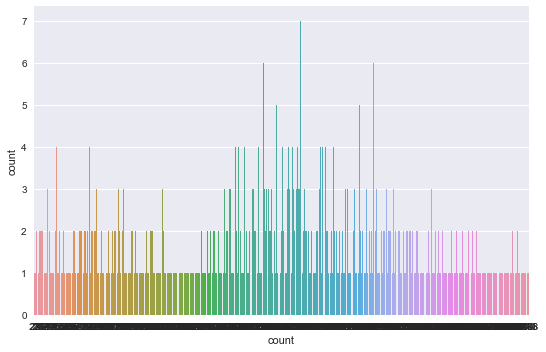

In [79]:
#Show the count of each 
sns.factorplot(x='count', data=counted_df, kind='count', size = 5, aspect=1.5)

In [86]:
#Split the dataset into training and test
x_train, x_test, y_train, y_test = train_test_split(counted_df.drop("count",axis=1),counted_df['count'],test_size=0.25, random_state=0)

In [91]:
#In Models select which algorithms you want to use to train different models and using mean_squared error see which one has the smallest error
models=[KNeighborsClassifier(), LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), GaussianNB(), RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=["KNeighborsClassifier","LogisticRegression", "LinearSVC", "DecisionTreeClassifier","GaussianNB", 'RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Futur

{'Modelling Algo': ['KNeighborsClassifier',
  'LogisticRegression',
  'LinearSVC',
  'DecisionTreeClassifier',
  'GaussianNB',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.7134032017404165,
  0.7805035393397655,
  1.2119922612261433,
  0.5702827286647173,
  0.6582176079984912,
  0.48295563774556693,
  0.8137582833112141,
  0.5096807311477431,
  0.8538266436822961,
  0.49997477076366675]}

In [92]:
#Lets show the results in a table for better view
rmsle_frame=pd.DataFrame(d)
rmsle_frame

Modelling Algo     RMSLE
0    KNeighborsClassifier  0.713403
1      LogisticRegression  0.780504
2               LinearSVC  1.211992
3  DecisionTreeClassifier  0.570283
4              GaussianNB  0.658218
5   RandomForestRegressor  0.482956
6       AdaBoostRegressor  0.813758
7        BaggingRegressor  0.509681
8                     SVR  0.853827
9     KNeighborsRegressor  0.499975

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


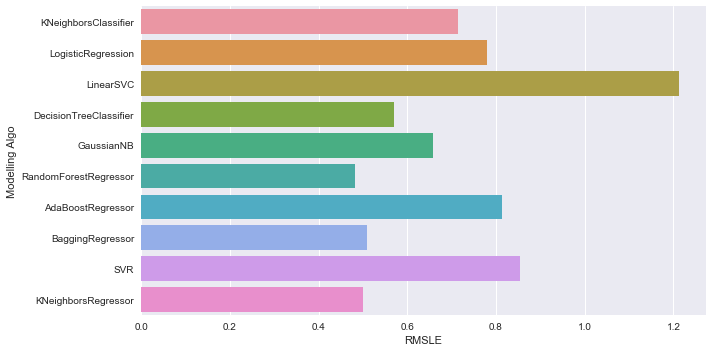

In [93]:
#Lets show it with a graph now
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)